In [27]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import random

In [28]:
'''
The dijkstra algortihm is used in optimization problems that require to quickly obtain the closest or shortest path to another connected
node in a network. These networks range from geographical plans to computational networks. Networks are defined by their connections and 
subsequently by their weights, which can represent distances, relevance or status.

This a simple implementation
'''

def dijkstra(matrix, root):
    '''
    Args:
     - matrix: a list of lists that contains the weight and the direction of the edges in the graph (adjacency matrix)
            ex: [[0, 1, 2, 3],
                 [2, 0, 3, 4],
                 [3, 4, 0, 5],
                 [4, 5, 6, 0]]
            --- 'node 1 directs to node 3 with a weight of 4'
            --- in this case nodes are not connected to themselves, but can be.
     - root: the node we want the shortest distances from
    All prints are for visualization purposes
    The path is not saved, I have only written code for it for visualization purposes.
    Returns the distance vector for the network from the root.
    '''
    def distance(matrix, i, j):
        '''
        Simple distance function, checks the weight in the adjacency matrix in coordinates (i, j)
        args:
         - matrix: the adjacency matrix
         - i: current node
         - j: edge direction
        Returns the weight or None if the nodees are not connected
        '''
        return matrix[i][j] if matrix[i][j] != 0 else None 

    def neighbours(matrix, i):
        ''' 
        Simple neightbour function, checks which nodes are connected to the current node i
        args:
         - i: current node
        Returns a list with all nodes connected to the current node, in order.
        '''
        return [j for j in range(len(matrix)) if distance(matrix, i, j) is not None]
    
    '''
    Initialise some variables:
     - distance_vector: list that saves the distance to the root. All initial distances except the root 
     are infinite to represent disconnection and easily update with lower values.
     - visited: set that saves the visited nodes, as to not reupdate the distance vector with previous distances.
     - heap: a special stack that saves the remaining nodes to visit and their weight. The stack always removes the lowest weight node.
     - previous: a list that saves the previous node to then print the path taken.
    '''

    distance_vector = [float("inf")] * len(matrix)
    distance_vector[root] = 0 
    visited = set()
    heap = [(0, root)] 
    previous = [None] * len(matrix)

    while heap:
        # until the heap is not empty (no remaining nodes to visit) keeps going through paths
        current_dist, u = heapq.heappop(heap)
        # load the current distance and current node 
        if u in visited:
            # check if the current node is in the visited set, skipping it if true
            continue 
        # if not in the visited set, add it and process it
        visited.add(u)
        print(f"\nVisiting vertex {u}, current distance: {current_dist}")
        # check all the weights from the current node to its neighbours with a loop
        for v in neighbours(matrix, u):
            # if the neighbour has been visited we do not go back to it, so skip it
            if v in visited:
                continue
            # add the distance to the origin to the distance of the new direction (alternate path)
            alt = current_dist + distance(matrix, u, v)
            # compare the alternate path with the current one to see which is smaller/lighter
            if alt < distance_vector[v]:
                # if the alternate path is better, we replace the current 
                distance_vector[v] = alt
                # and add the current node as the previous to the neighbour
                previous[v] = u
                # update the heap with the neightbour and its weight
                heapq.heappush(heap, (alt, v))
                print(f" --> Updated distance to vertex {v}: {alt}")
    
    print(f"\nShortest paths from node {root}:")
    # a loop to print the paths taken from the root to the destinations
    for target_node in range(len(matrix)):
        if target_node == root:
            continue
        if distance_vector[target_node] == float('inf'):
            # check if the node is connected
            print(f"Node {target_node} is unreachable from node {root}")
            continue
        # initialise a path list and a current node variable
        path = []
        current = target_node
        # recreate the path to the root
        while current is not None:
            path.append(current)
            current = previous[current]
        # reverse the path to go from the root to the destination
        path.reverse()
        print(f"To node {target_node}: path = {path}, distance = {distance_vector[target_node]}")
    
    print(f"\nFinal shortest distances from source vertex {root}:")
    print(distance_vector)

    return distance_vector

def random_graph(n, thresh, max_weight):
    '''
    Simple code to generate a random situation
    Args:
     - n: number of nodes in the network - integer
     - thresh: a threshold that marks a random amount of edges - float - ex: 0.14, 0.6, 0.259
     - max_weight: the maximum weight an edge can have, the weight goes from 1 to the max - integer
    Returns an adjacency matrix
    '''
    # initialise the matrix
    matrix = [[0 if i == j or random.random() > thresh else random.randint(1, max_weight) for j in range(n)] for i in range(n)]
    # compute all the edges in the matrix, with its directions and weights.
    edges = [(i, j, matrix[i][j]) for i in range(n) for j in range(n) if matrix[i][j] != 0]

    print("Adjacency Matrix:")
    for row in matrix:
        print(row)
    
    print("\nEdges with weights:")
    print(edges)
    return matrix

def print_graph(matrix):
    '''
    Using the networkx library to visualize the network graph
    Args:
     - matrix: the adjacency matrix of the network
    '''
    # initialise the graph
    G = nx.MultiDiGraph()
    # compute the edges and add them to the graph
    edges = [(i, j, matrix[i][j]) for i in range(len(matrix)) for j in range(len(matrix)) if matrix[i][j] != 0]
    G.add_weighted_edges_from(edges)
    labels = nx.get_edge_attributes(G, "weight")
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.2', node_size = 1000, node_color = 'red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, connectionstyle='arc3, rad = 0.2')
    plt.show()

Adjacency Matrix:
[0, 5, 0, 0, 0, 0, 0, 0]
[0, 0, 6, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 7, 8, 13]
[4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 15, 0, 0, 0, 0, 0, 0]

Edges with weights:
[(0, 1, 5), (1, 2, 6), (1, 5, 1), (2, 5, 7), (2, 6, 8), (2, 7, 13), (3, 0, 4), (7, 1, 15)]


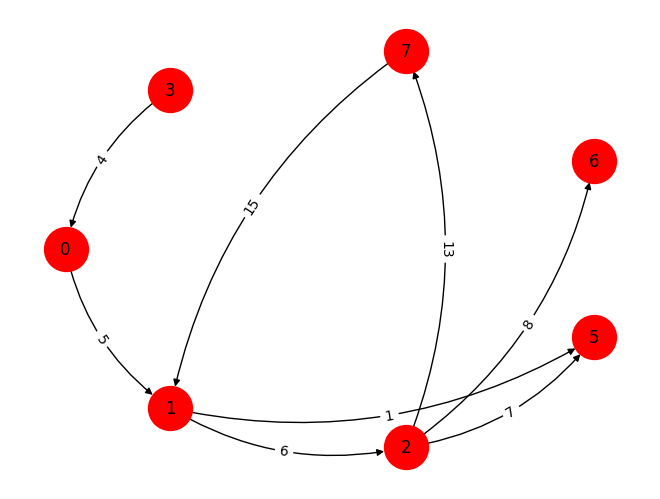

In [41]:
"--- Random example ---"
matrix = random_graph(8, .15, 15)
print_graph(matrix)


In [42]:
"--- Compute the distance vector of the random example ---"
distance_vector = dijkstra(matrix, 3)
# The representation of the distance vector is the total distance to the nodes through the edges.
# If the distance is infinite then the nodes are not connected through any path.


Visiting vertex 3, current distance: 0
 --> Updated distance to vertex 0: 4

Visiting vertex 0, current distance: 4
 --> Updated distance to vertex 1: 9

Visiting vertex 1, current distance: 9
 --> Updated distance to vertex 2: 15
 --> Updated distance to vertex 5: 10

Visiting vertex 5, current distance: 10

Visiting vertex 2, current distance: 15
 --> Updated distance to vertex 6: 23
 --> Updated distance to vertex 7: 28

Visiting vertex 6, current distance: 23

Visiting vertex 7, current distance: 28

Shortest paths from node 3:
To node 0: path = [3, 0], distance = 4
To node 1: path = [3, 0, 1], distance = 9
To node 2: path = [3, 0, 1, 2], distance = 15
Node 4 is unreachable from node 3
To node 5: path = [3, 0, 1, 5], distance = 10
To node 6: path = [3, 0, 1, 2, 6], distance = 23
To node 7: path = [3, 0, 1, 2, 7], distance = 28

Final shortest distances from source vertex 3:
[4, 9, 15, 0, inf, 10, 23, 28]


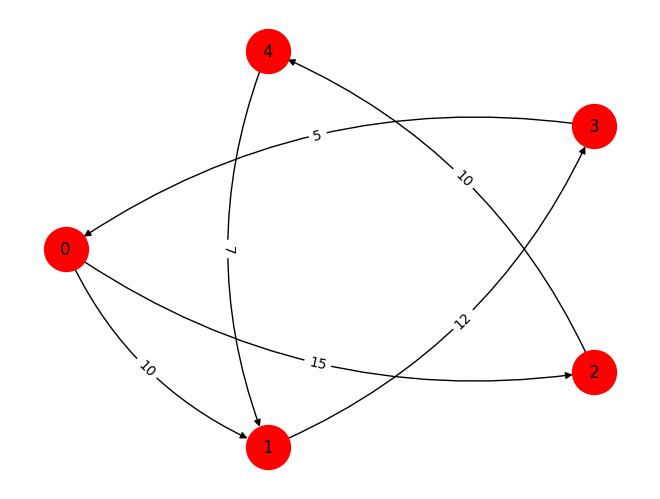

In [31]:
# specific case

'''
In computer networks, an important task speed. Latency measured in ms is the difference in time that it takes for two nodes to contact. 
Using the dijkstra algorithm it is possible to process with minimal computational power the shortest paths information has to 
take to get to a node based on the weight of the latency they have at the moment.

A simple network with 5 servers and their latency

   A  B  C  D  E
A  0  10 15 0  0
B  0  0  0  12 0
C  0  0  0  0  10
D  5  0  0  0  0
E  0  7  0  0  0   
'''

matrix_set = [[0, 10, 15, 0, 0],
              [0, 0, 0, 12, 0],
              [0, 0, 0, 0, 10],
              [5, 0, 0, 0, 0],
              [0, 7, 0, 0, 0]]

print_graph(matrix_set)

In [32]:
'''
The final distance vector [0, 10, 15, 22, 25] shows all the shortest distances between the servers and the root (0).
The paths for the nodes are not saved, but could (and should) for future purposes, such as sending packets through the paths.

Improvements to the problem would be to compute multiple graphs at a time, and represent the optimization 
problem as a constantly updating network.
'''
distance_vector2 = dijkstra(matrix_set, 0)



Visiting vertex 0, current distance: 0
 --> Updated distance to vertex 1: 10
 --> Updated distance to vertex 2: 15

Visiting vertex 1, current distance: 10
 --> Updated distance to vertex 3: 22

Visiting vertex 2, current distance: 15
 --> Updated distance to vertex 4: 25

Visiting vertex 3, current distance: 22

Visiting vertex 4, current distance: 25

Shortest paths from node 0:
To node 1: path = [0, 1], distance = 10
To node 2: path = [0, 2], distance = 15
To node 3: path = [0, 1, 3], distance = 22
To node 4: path = [0, 2, 4], distance = 25

Final shortest distances from source vertex 0:
[0, 10, 15, 22, 25]
